Import packages and load dataframe. These models predict a binary classification: either above or below then national median EUI. Energy Star Rating has been removed as a feature.

In [ ]:
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import requests
import config
import json
from bs4 import BeautifulSoup as bs
import re
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [18]:
df = pd.read_csv('cleandatawithnewfeatures.csv')
pd.set_option('display.max_columns', None)
df = df.drop('Unnamed: 0', axis=1)

In [69]:
len(df)

10578

In [20]:
df['Primary Property Type - Self Selected'].value_counts()

Multifamily Housing                      8413
Office                                   1192
Hotel                                     207
Non-Refrigerated Warehouse                161
Residence Hall/Dormitory                   93
Senior Care Community                      90
Retail Store                               85
College/University                         85
K-12 School                                79
Distribution Center                        65
Hospital (General Medical & Surgical)      33
Supermarket/Grocery Store                  15
Other - Specialty Hospital                  9
Refrigerated Warehouse                      8
Strip Mall                                  8
Other - Education                           8
Medical Office                              7
Other - Mall                                7
Residential Care Facility                   5
Enclosed Mall                               4
Other - Lodging/Residential                 4
Name: Primary Property Type - Self

Define function to create new column for dependent variable: above or below national median EUI, adjusted by building type.

In [21]:
def median_or_nah(row):
    row['above median'] = 0
    verdict = 0 
    if row['Primary Property Type - Self Selected'] == 'Multifamily Housing' and row['Source EUI (kBtu/ftå_)'] > 118.1:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Office' and row['Source EUI (kBtu/ftå_)'] > 116.4:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Hotel' and row['Source EUI (kBtu/ftå_)'] > 146.7:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Non-Regrigerated Warehouse' and row['Source EUI (kBtu/ftå_)'] > 52.9:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Residence Hall/Dormitory' and row['Source EUI (kBtu/ftå_)'] > 107.5:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Senior Care Community' and row['Source EUI (kBtu/ftå_)'] > 213.2:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Retail Store' and row['Source EUI (kBtu/ftå_)'] > 120.0 :
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'College/University' and row['Source EUI (kBtu/ftå_)'] > 180.6  :
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'K-12 School' and row['Source EUI (kBtu/ftå_)'] > 104.4  :
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Distribution Center' and row['Source EUI (kBtu/ftå_)'] > 52.9  :
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Hospital (General Medical & Surgical)' and row['Source EUI (kBtu/ftå_)'] > 426.9:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Supermarket/Grocery Store' and row['Source EUI (kBtu/ftå_)'] > 444.0:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Other - Specialty Hospital' and row['Source EUI (kBtu/ftå_)'] > 433.9:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Refrigerated Warehouse' and row['Source EUI (kBtu/ftå_)'] > 235.6:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Strip Mall' and row['Source EUI (kBtu/ftå_)'] > 228.8:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Other - Education' and row['Source EUI (kBtu/ftå_)'] > 110.4 :
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Medical Office' and row['Source EUI (kBtu/ftå_)'] > 121.7:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Other - Mall' and row['Source EUI (kBtu/ftå_)'] > 225.3:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Residential Care Facility' and row['Source EUI (kBtu/ftå_)'] > 213.2:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Enclosed Mall' and row['Source EUI (kBtu/ftå_)'] > 170.7:
        verdict = 1
    elif row['Primary Property Type - Self Selected'] == 'Other - Lodging/Residential' and row['Source EUI (kBtu/ftå_)'] > 143.6:
        verdict = 1
    row['above median'] = verdict
    return row 
    
    
    
    

In [22]:
df = df.apply(median_or_nah, axis=1)

In [25]:
df.head()

,Property Id,Property Name,Postal Code,Source EUI (kBtu/ftå_),Number of Buildings - Self-reported,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ftå_),Year Built,Metered Areas (Energy),ENERGY STAR Score,Median Income for Zip,building_type,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total,ENERGY STAR binned,binned source EUI,above median
0,"13,286",201/205,10017,619.4,2,Manhattan,Office,293447.0,1963,Whole Building,NaN,69273.0,large office,0.971583,0.028417,0.000000,0.000000,0.307671,0.399872,0.026777,0.000000,0.265680,0.797097,Not Available,Extremely High,1
1,"28,400",NYP Columbia (West Campus),10032,404.3,12,Manhattan,Hospital (General Medical & Surgical),3889181.0,1969,Whole Building,55.0,26237.0,hospital / medical,0.881768,0.040166,0.078068,0.000000,0.190192,0.258703,0.085218,0.035428,0.443534,0.724485,Moderate,Extremely High,0
2,"28,402",NYP Cornell (East Campus),10021,414.2,12,Manhattan,Hospital (General Medical & Surgical),2971874.0,1932,Whole Building,55.0,75472.0,hospital / medical,0.881768,0.040166,0.078068,0.000000,0.190192,0.258703,0.085218,0.035428,0.443534,0.724485,Moderate,Extremely High,0
3,"5,871,253",Cadman - 10 Clinton St,11201,352.2,1,Brooklyn,Multifamily Housing,162656.0,1903,Whole Building,1.0,56293.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,Low,Extremely High,1
4,"4,988,574",- 720 Ft. Washington Ave. bldg,10040,106.6,1,Manhattan,Multifamily Housing,204720.0,1939,Whole Building,67.0,27905.0,residential,0.831703,0.168291,0.000000,0.004439,0.320048,0.434433,0.083000,0.000000,0.158071,0.081088,High,Moderate,0


In [27]:
df['above median'].value_counts()

1    5939
0    4639
Name: above median, dtype: int64

Select features that will be included in model. 

In [35]:
df_final = df[['above median', 'gas_heat', 'gas_water', 'gas_equip', 'elec_heat', 'elec_lighting', 'elec_equipment', 'elec_fans', 'elec_ref', 'elec_cool', 'elec_percent_total', 'Median Income for Zip', 'Year Built', 'Largest Property Use Type - Gross Floor Area (ftå_)', 'Primary Property Type - Self Selected', 'Borough', 'Number of Buildings - Self-reported']]





In [38]:
df_final.rename(columns={'Number of Buildings - Self-reported':'Number of Buildings',
                          'Primary Property Type - Self Selected':'Primary Property Type',
                          'Largest Property Use Type - Gross Floor Area (ftå_)':'Gross Floor Area'}, 
                 inplace=True)

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Normalize independent variables.

In [39]:
df_final['Gross Floor Area'] = (df_final['Gross Floor Area'] - np.mean(df_final['Gross Floor Area'])) / np.sqrt(np.var(df_final['Gross Floor Area']))
df_final['Year Built'] = (df_final['Year Built'] - np.mean(df_final['Year Built'])) / np.sqrt(np.var(df_final['Year Built']))
df_final['Median Income for Zip'] = (df_final['Median Income for Zip'] - np.mean(df_final['Median Income for Zip'])) / np.sqrt(np.var(df_final['Median Income for Zip']))
df_final['Number of Buildings'] = (df_final['Number of Buildings'] - np.mean(df_final['Number of Buildings'])) / np.sqrt(np.var(df_final['Number of Buildings']))
df_final['gas_heat'] = (df_final['gas_heat'] - np.mean(df_final['gas_heat'])) / np.sqrt(np.var(df_final['gas_heat']))
df_final['gas_water'] = (df_final['gas_water'] - np.mean(df_final['gas_water'])) / np.sqrt(np.var(df_final['gas_water']))
df_final['gas_equip'] = (df_final['gas_equip'] - np.mean(df_final['gas_equip'])) / np.sqrt(np.var(df_final['gas_equip']))
df_final['elec_heat'] = (df_final['elec_heat'] - np.mean(df_final['elec_heat'])) / np.sqrt(np.var(df_final['elec_heat']))
df_final['elec_lighting'] = (df_final['elec_lighting'] - np.mean(df_final['elec_lighting'])) / np.sqrt(np.var(df_final['elec_lighting']))
df_final['elec_equipment'] = (df_final['elec_equipment'] - np.mean(df_final['elec_equipment'])) / np.sqrt(np.var(df_final['elec_equipment']))
df_final['elec_fans'] = (df_final['elec_fans'] - np.mean(df_final['elec_fans'])) / np.sqrt(np.var(df_final['elec_fans']))
df_final['elec_ref'] = (df_final['elec_ref'] - np.mean(df_final['elec_ref'])) / np.sqrt(np.var(df_final['elec_ref']))
df_final['elec_cool'] = (df_final['elec_cool'] - np.mean(df_final['elec_cool'])) / np.sqrt(np.var(df_final['elec_cool']))
df_final['elec_percent_total'] = (df_final['elec_percent_total'] - np.mean(df_final['elec_percent_total'])) / np.sqrt(np.var(df_final['elec_percent_total']))

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [40]:
df_final

,above median,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total,Median Income for Zip,Year Built,Gross Floor Area,Primary Property Type,Borough,Number of Buildings
0,1,1.249428,-1.395162,-0.189896,-0.552515,-0.528153,-0.176898,-1.460124,-0.066904,1.300477,2.166622,0.944053,0.497395,0.536886,Office,Manhattan,0.180882
1,0,0.429915,-1.269675,3.529133,-0.552515,-1.745510,-2.110497,0.066016,1.510391,3.741338,1.883785,-0.996745,0.696392,14.117992,Hospital (General Medical & Surgical),Manhattan,2.650070
2,0,0.429915,-1.269675,3.529133,-0.552515,-1.745510,-2.110497,0.066016,1.510391,3.741338,1.883785,1.223610,-0.530756,10.653319,Hospital (General Medical & Surgical),Manhattan,2.650070
3,1,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,0.358693,-1.492575,0.042888,Multifamily Housing,Brooklyn,-0.066036
4,0,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,-0.921523,-0.298593,0.201764,Multifamily Housing,Manhattan,-0.066036
5,0,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,-0.921523,-0.298593,-0.130522,Multifamily Housing,Manhattan,-0.066036
6,0,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,1.223610,-1.227245,-0.078078,Multifamily Housing,Manhattan,-0.066036
7,0,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,1.223610,-1.227245,-0.364058,Multifamily Housing,Manhattan,-0.066036
8,0,0.704602,-1.184293,1.714089,-0.552515,0.722066,-2.628159,2.540010,0.531283,-0.185843,1.163925,-1.135960,0.530561,0.397443,College/University,Manhattan,-0.066036
9,0,0.704602,-1.184293,1.714089,-0.552515,0.722066,-2.628159,2.540010,0.531283,-0.185843,1.163925,-1.135960,0.530561,0.709333,College/University,Manhattan,-0.066036


In [41]:
bor_dummies = pd.get_dummies(df_final['Borough'], prefix='bor', drop_first=True)
type_dummies = pd.get_dummies(df_final['Primary Property Type'], prefix='type', drop_first=True)

In [42]:
df_final = df_final.drop(['Borough','Primary Property Type'], axis=1)

In [43]:
df_final = pd.concat([df_final, bor_dummies, type_dummies], axis=1)
df_final.head()

,above median,gas_heat,gas_water,gas_equip,elec_heat,elec_lighting,elec_equipment,elec_fans,elec_ref,elec_cool,elec_percent_total,Median Income for Zip,Year Built,Gross Floor Area,Number of Buildings,bor_Brooklyn,bor_Manhattan,bor_Queens,bor_Staten Island,type_Distribution Center,type_Enclosed Mall,type_Hospital (General Medical & Surgical),type_Hotel,type_K-12 School,type_Medical Office,type_Multifamily Housing,type_Non-Refrigerated Warehouse,type_Office,type_Other - Education,type_Other - Lodging/Residential,type_Other - Mall,type_Other - Specialty Hospital,type_Refrigerated Warehouse,type_Residence Hall/Dormitory,type_Residential Care Facility,type_Retail Store,type_Senior Care Community,type_Strip Mall,type_Supermarket/Grocery Store
0,1,1.249428,-1.395162,-0.189896,-0.552515,-0.528153,-0.176898,-1.460124,-0.066904,1.300477,2.166622,0.944053,0.497395,0.536886,0.180882,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.429915,-1.269675,3.529133,-0.552515,-1.745510,-2.110497,0.066016,1.510391,3.741338,1.883785,-0.996745,0.696392,14.117992,2.650070,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.429915,-1.269675,3.529133,-0.552515,-1.745510,-2.110497,0.066016,1.510391,3.741338,1.883785,1.223610,-0.530756,10.653319,2.650070,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,0.358693,-1.492575,0.042888,-0.066036,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,-0.026898,0.098773,-0.189896,0.123066,-0.399900,0.296489,0.008093,-0.066904,-0.176349,-0.622370,-0.921523,-0.298593,0.201764,-0.066036,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Create training and test sets. Run model. 

In [44]:
X = df_final.drop('above median', axis=1)  
y = df_final['above median'] 

X_train, X_test , y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)



In [45]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 5)

clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)

In [46]:
acc = accuracy_score(y_test,y_preds) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print("\nAUC is :{0}".format(round(roc_auc,2)))


# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy is :62.98046628859484

Confusion Matrix
----------------


Predicted,0,1,All
Actual,,,
0,809,553,1362
1,622,1190,1812
All,1431,1743,3174


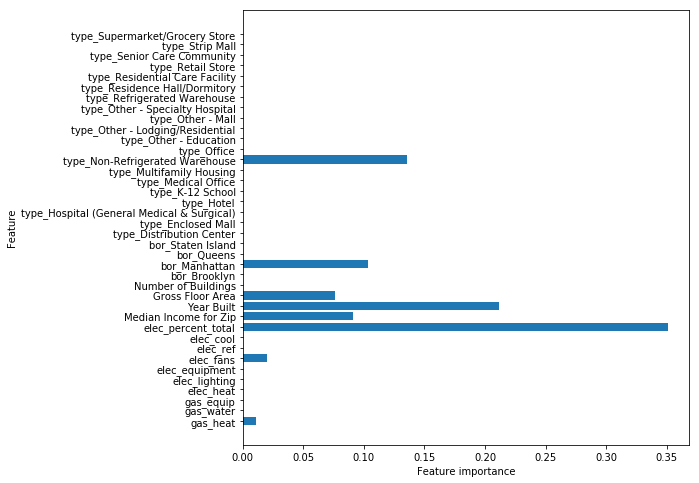

In [48]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(clf)

In [49]:
dt_cv_score = cross_val_score(clf, X_train, y_train, cv=10)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 63.92%


In [50]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [51]:
dt_grid_search = GridSearchCV(clf, dt_param_grid, cv=3, return_train_score=True)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                

In [52]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_train, y_train)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Testing Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 67.70%
Mean Testing Score: 65.51%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Re-run decision tree model with optimal parameters 

In [58]:
X = df_final.drop('above median', axis=1)  
y = df_final['above median'] 

X_train, X_test , y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)


In [59]:
clf = DecisionTreeClassifier(criterion='gini', max_depth = 6, min_samples_leaf= 1, min_samples_split= 2)

clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)

In [60]:
acc = accuracy_score(y_test,y_preds) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print("\nAUC is :{0}".format(round(roc_auc,2)))


# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy is :63.45305608065532

Confusion Matrix
----------------


Predicted,0,1,All
Actual,,,
0,930,465,1395
1,695,1084,1779
All,1625,1549,3174


In [66]:
print(confusion_matrix(y_test,y_preds))  
print(classification_report(y_test,y_preds)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_preds)))

[[ 930  465]
 [ 695 1084]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62      1395
           1       0.70      0.61      0.65      1779

    accuracy                           0.63      3174
   macro avg       0.64      0.64      0.63      3174
weighted avg       0.64      0.63      0.64      3174

The accuracy score is 0.6345305608065532


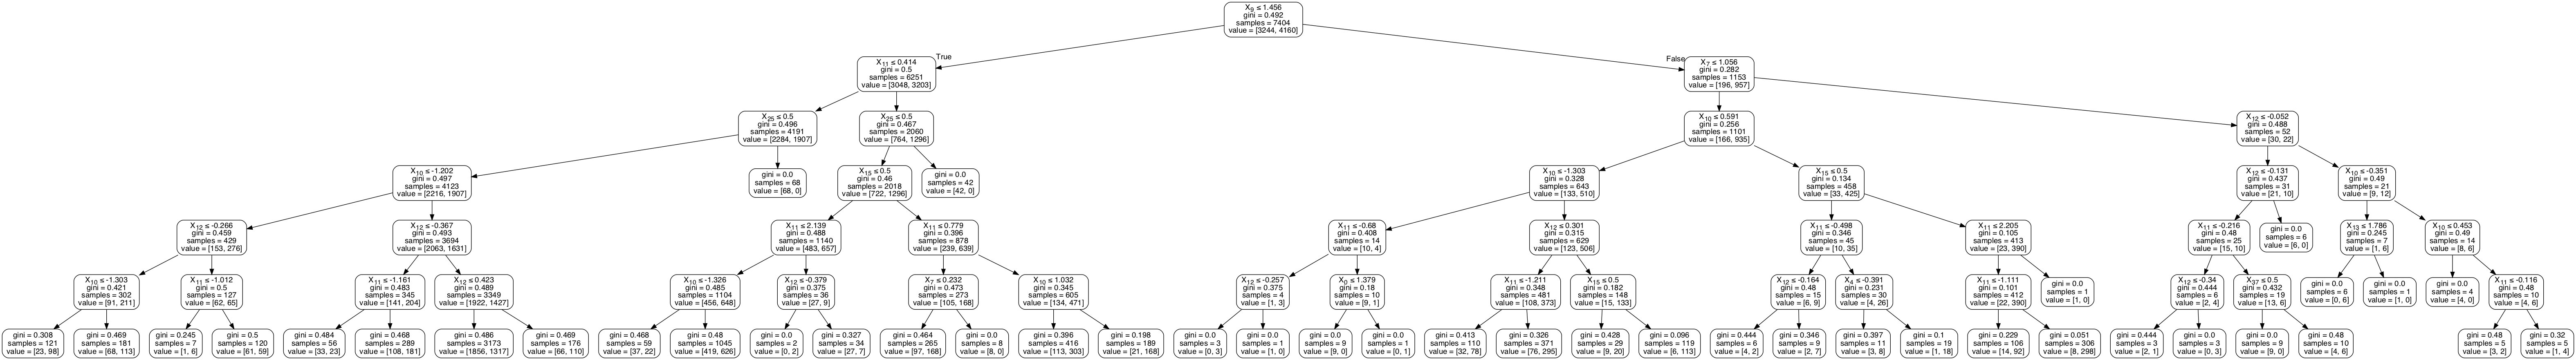

In [61]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Run a random forest model

In [71]:
X = df_final.drop('above median', axis=1)  
y = df_final['above median'] 

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)



In [72]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5, criterion='entropy')
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
forest.score(X_train, y_train)

0.6503241491085899

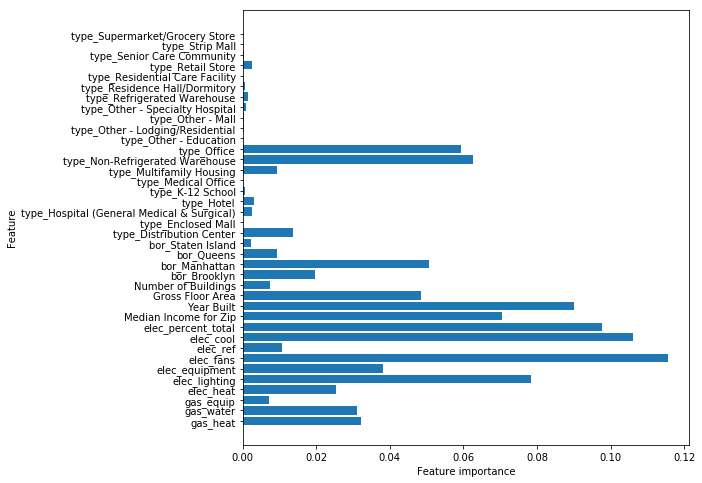

In [74]:
plot_feature_importances(forest)

More interesting distribution of feature important when Energy Star Rating is removed. 

In [75]:
forest = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(forest, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Cross Validation Score for Random Forest Classifier: 63.11%


In [76]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [77]:
import time
start = time.time()
rf_grid_search = GridSearchCV(forest, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print(f"Total Runtime for Grid Search on Random Forest Classifier: {time.time() - start :.2f} seconds")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 66.63%
Total Runtime for Grid Search on Random Forest Classifier: 55.55 seconds

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}


In [ ]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(X_train, y_train)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Testing Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Re-run model with optimal parameters.

In [84]:
X = df_final.drop('above median', axis=1)  
y = df_final['above median'] 

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 120)



In [85]:
forest = RandomForestClassifier(n_estimators=30, max_depth= None, criterion='gini', min_samples_leaf= 3, min_samples_split= 5 )
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
forest.score(X_train, y_train)

0.821042679632631

Very high training score. 

In [87]:
forest.score(X_test, y_test)

0.6606805293005671

Small increase in accuracy overall.

In [88]:
y_preds = forest.predict(X_test)

In [89]:
acc = accuracy_score(y_test,y_preds) * 100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#print("\nAUC is :{0}".format(round(roc_auc,2)))


# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_preds, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy is :66.06805293005671

Confusion Matrix
----------------


Predicted,0,1,All
Actual,,,
0,761,560,1321
1,517,1336,1853
All,1278,1896,3174


In [90]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_preds))  
print(classification_report(y_test,y_preds)) 
print("The accuracy score is" + " "+ str(accuracy_score(y_test, y_preds)))

[[ 761  560]
 [ 517 1336]]
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      1321
           1       0.70      0.72      0.71      1853

    accuracy                           0.66      3174
   macro avg       0.65      0.65      0.65      3174
weighted avg       0.66      0.66      0.66      3174

The accuracy score is 0.6606805293005671


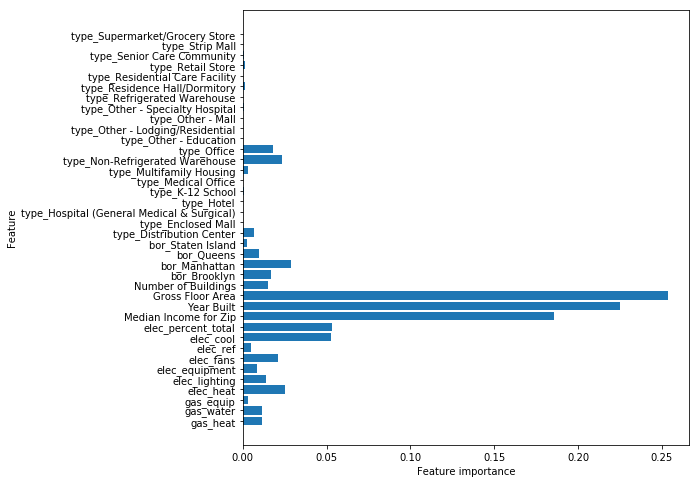

In [80]:
plot_feature_importances(forest)

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_preds)
classes = ['Below', 'Above']

In [93]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[ 761  560]
 [ 517 1336]]


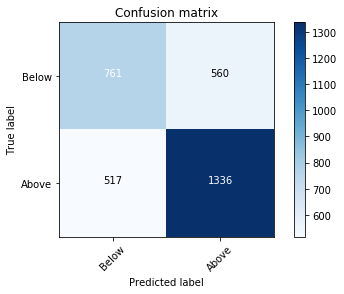

In [94]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [96]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion = sklearn.metrics.confusion_matrix(y_test, y_preds)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [99]:
print((TP + TN) / float(TP + TN + FP + FN))

0.6606805293005671


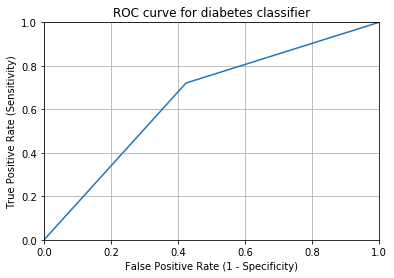

In [101]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_preds)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Principle component analysis to measure the effect of continuous variables 

In [102]:
features = ['gas_heat', 'gas_water', 'gas_equip', 'elec_heat', 'elec_lighting', 'elec_equipment', 'elec_fans', 'elec_ref', 'elec_cool', 'elec_percent_total', 'Median Income for Zip', 'Year Built', 'Gross Floor Area', 'Number of Buildings']
            
            
            
            

In [107]:
len(features)

14

In [104]:
# preprocess the data 
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df_final.loc[:, features].values
# Separating out the target
y = df_final.loc[:,['above median']].values

In [105]:
x = StandardScaler().fit_transform(x)

In [108]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4',
                                                                 'principal component 5','principal component 6',
                                                                 'principal component 7','principal component 8',
                                                                 'principal component 9', 'principal component 10',
                                                                 'principal component 11', 'principal component 12',
                                                                 'principal component 13', 'principal component 14',])

In [109]:
pca.explained_variance_ratio_

array([0.24200679, 0.15112793, 0.11683676, 0.11321982, 0.07528975,
       0.07031824, 0.06717312, 0.06345641, 0.06167734, 0.02139449,
       0.00892681, 0.00538377, 0.00226882, 0.00091994])

In [110]:
pca.explained_variance_

array([3.38841545, 2.11599103, 1.63586923, 1.5852273 , 1.0541562 ,
       0.98454849, 0.94051262, 0.88847374, 0.86356444, 0.29955112,
       0.12498722, 0.07537995, 0.03176651, 0.01288034])

In [111]:
principalDf.iloc[:,:3].head()

,principal component 1,principal component 2,principal component 3
0,-0.029906,1.014070,3.401077
1,4.294477,4.042110,6.566005
2,4.280682,3.692804,6.308741
3,-0.135365,-0.953546,0.128548
4,-0.201418,-0.804520,-0.370121


In [112]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

[3.38841545 2.11599103 1.63586923 1.5852273  1.0541562  0.98454849
 0.94051262 0.88847374 0.86356444 0.29955112 0.12498722 0.07537995
 0.03176651 0.01288034]
[[-4.75457632e-01  4.35435471e-01  4.96863545e-01 -1.96714881e-02
  -2.24713893e-01 -1.74909761e-01 -1.26252083e-01  3.97682991e-02
   4.70838984e-01  1.09491155e-01  5.63084756e-02 -2.91716238e-04
   4.01705672e-02 -1.64664151e-03]
 [ 1.02428554e-01 -1.97267529e-01  1.94130755e-01 -1.89501757e-01
   3.53087340e-01 -5.51691266e-01  3.70237148e-01  2.32938446e-01
  -4.77422047e-03  4.42564428e-01  9.19030835e-02  2.12098590e-01
   8.45929579e-02 -1.23464901e-02]
 [ 3.01162885e-01 -3.32456157e-01 -7.23872133e-02 -1.75518478e-01
  -2.56480705e-01  1.07381778e-01 -4.53104947e-01  4.92154153e-03
   3.18816607e-01  4.30256282e-01  2.61555151e-01 -1.77769765e-01
   3.04836718e-01  1.95590025e-02]
 [-1.21190427e-01  1.52704510e-01 -5.06320259e-02  4.68854916e-02
   4.59802859e-01  3.03038773e-01 -3.38191809e-01 -1.92211901e-01
  -1.289258

In [113]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]

In [114]:
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features)
str_loading_1

gas_heat                -0.875206
gas_water                0.801534
gas_equip                0.914609
elec_heat               -0.036211
elec_lighting           -0.413645
elec_equipment          -0.321968
elec_fans               -0.232400
elec_ref                 0.073204
elec_cool                0.866704
elec_percent_total       0.201547
Median Income for Zip    0.103651
Year Built              -0.000537
Gross Floor Area         0.073945
Number of Buildings     -0.003031
dtype: float64

In [115]:
str_loading_1.sort_values(ascending=False)

gas_equip                0.914609
elec_cool                0.866704
gas_water                0.801534
elec_percent_total       0.201547
Median Income for Zip    0.103651
Gross Floor Area         0.073945
elec_ref                 0.073204
Year Built              -0.000537
Number of Buildings     -0.003031
elec_heat               -0.036211
elec_fans               -0.232400
elec_equipment          -0.321968
elec_lighting           -0.413645
gas_heat                -0.875206
dtype: float64

Text(0, 0.5, 'proportion of explained variance')

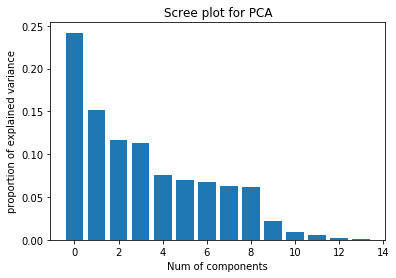

In [117]:
index = np.arange(14)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

Text(0, 0.5, 'explained variance ratio')

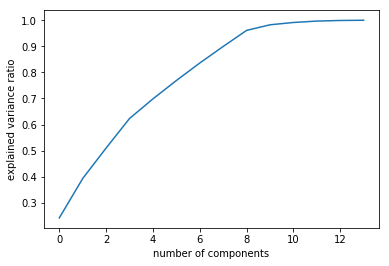

In [118]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')

In [120]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

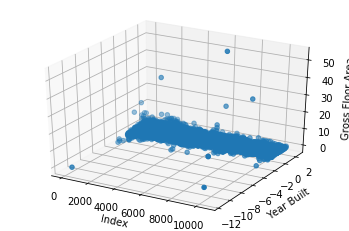

<Figure size 1440x1440 with 0 Axes>

In [128]:
threedee = plt.figure().gca(projection='3d')
plt.figure(figsize=(20,20))
threedee.scatter(df_final.index, df_final['Year Built'], df_final['Gross Floor Area'])
threedee.set_xlabel('Index')
threedee.set_ylabel('Year Built')
threedee.set_zlabel('Gross Floor Area')
plt.show()